In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("/content/Mall_Customers - Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
print(data.duplicated().sum())

0


In [ ]:
data=data.drop("CustomerID", axis=1)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


<Axes: >

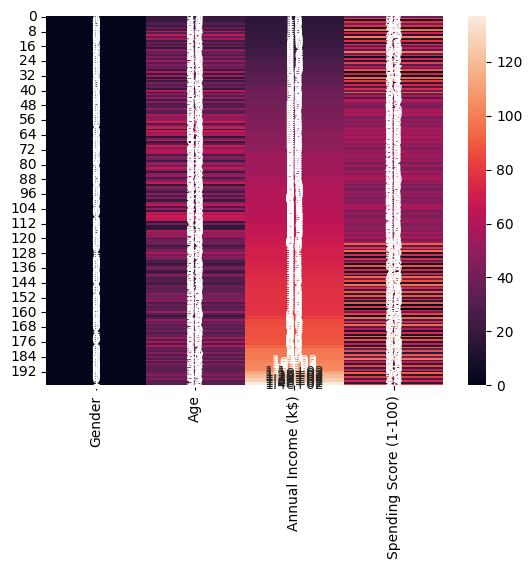

In [ ]:
sns.heatmap(data,annot=True)

In [ ]:
x=data[['Annual Income (k$)','Spending Score (1-100)']].copy()

<function matplotlib.pyplot.show(close=None, block=None)>

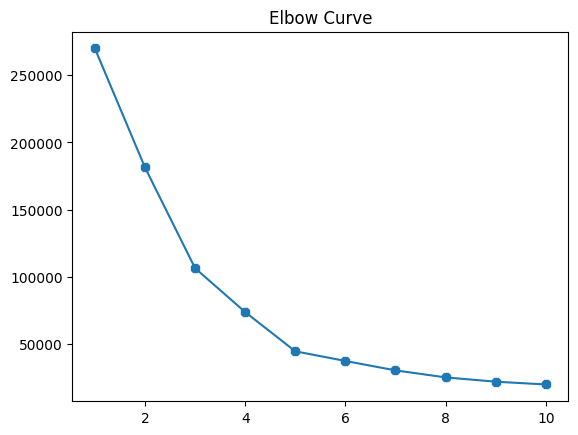

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,n_init=10)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, marker="8")
plt.title('Elbow Curve')
plt.show

In [ ]:
kmeans=KMeans(n_clusters=5, n_init=10)
label=kmeans.fit_predict(x)
print(label)


[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [ ]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


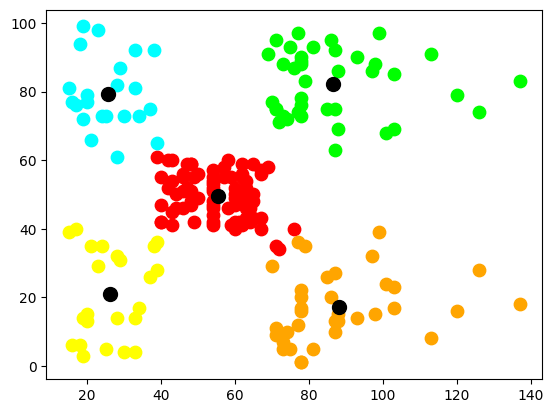

In [ ]:
plt.scatter(x.loc[label==0,'Annual Income (k$)'],x.loc[label==0,'Spending Score (1-100)'],s=80,c='red',label='cluster1')
plt.scatter(x.loc[label==1,'Annual Income (k$)'],x.loc[label==1,'Spending Score (1-100)'],s=80,c='orange',label='cluster2')
plt.scatter(x.loc[label==2,'Annual Income (k$)'],x.loc[label==2,'Spending Score (1-100)'],s=80,c='cyan',label='cluster3')
plt.scatter(x.loc[label==3,'Annual Income (k$)'],x.loc[label==3,'Spending Score (1-100)'],s=80,c='lime',label='cluster4')
plt.scatter(x.loc[label==4,'Annual Income (k$)'],x.loc[label==4,'Spending Score (1-100)'],s=80,c='yellow',label='cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='centroids')



In [ ]:
y=data[['Annual Income (k$)','Spending Score (1-100)','Age']].copy()

<function matplotlib.pyplot.show(close=None, block=None)>

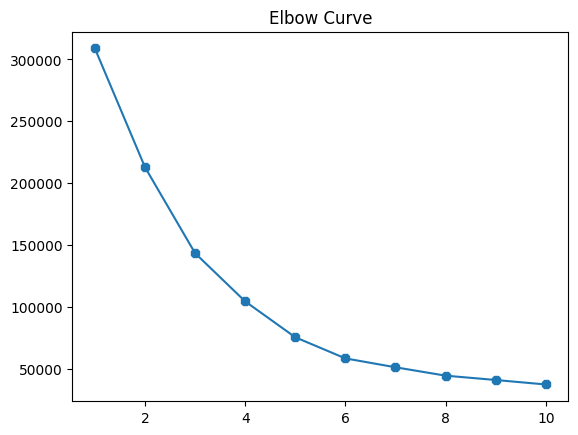

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,n_init=10)
  kmeans.fit(y)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, marker="8")
plt.title('Elbow Curve')
plt.show

In [ ]:
kmeans=KMeans(n_clusters=6, n_init=10)
label=kmeans.fit_predict(y)
print(label)

[4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4
 5 4 5 1 5 1 0 4 5 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 2 0 2 3 2 3 2 3 2 0 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


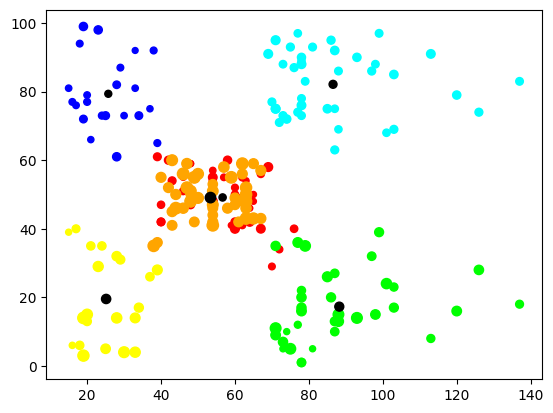

In [ ]:
plt.scatter(y.loc[label==0,'Annual Income (k$)'],y.loc[label==0,'Spending Score (1-100)'],y.loc[label==0,'Age'],c='red',label='cluster1')
plt.scatter(y.loc[label==1,'Annual Income (k$)'],y.loc[label==1,'Spending Score (1-100)'],y.loc[label==1,'Age'],c='orange',label='cluster2')
plt.scatter(y.loc[label==2,'Annual Income (k$)'],y.loc[label==2,'Spending Score (1-100)'],y.loc[label==2,'Age'],c='cyan',label='cluster3')
plt.scatter(y.loc[label==3,'Annual Income (k$)'],y.loc[label==3,'Spending Score (1-100)'],y.loc[label==3,'Age'],c='lime',label='cluster4')
plt.scatter(y.loc[label==4,'Annual Income (k$)'],y.loc[label==4,'Spending Score (1-100)'],y.loc[label==4,'Age'],c='yellow',label='cluster5')
plt.scatter(y.loc[label==5,'Annual Income (k$)'],y.loc[label==5,'Spending Score (1-100)'],y.loc[label==5,'Age'],c='blue',label='cluster6')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],c='black',label='centroids')



In [ ]:
y

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31
...,...,...,...
195,120,79,35
196,126,28,45
197,126,74,32
198,137,18,32
